In [53]:
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as stats 
from scipy.stats import shapiro

In [54]:
# Import/Read CSV

listings_path = "../Data-Project-1/ri.listings.csv"
ri_listings = pd.read_csv(listings_path, encoding='latin-1')
ri_listings.head()

,id,name,bedrooms,beds,baths,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,290088,Rental unit in Narragansett,1 bedroom,1 bed,1 bath,1505626,Steve,12/14/11,"Narragansett, RI",NaN,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.01
1,20517387,Rental unit in Barrington,1 bedroom,1 bed,1 bath,1488482,Julie And Evan,12/9/11,"Barrington, RI",a few days or more,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.02
2,40347808,Rental unit in Providence,1 bedroom,1 bed,2 shared baths,201374777,Shaina,7/10/18,"Somerville, MA",within an hour,...,5.0,3.0,1.0,NaN,f,16,0,16,0,0.05
3,45606865,Rental unit in East Providence,1 bedroom,1 bed,1 bath,274530655,Rosinha,7/8/19,"Providence, RI",NaN,...,1.0,1.0,1.0,NaN,f,1,1,0,0,0.03
4,694430604665215000,casa particular in Providence,1 bedroom,1 bed,1 shared bath,395662826,Tasia,4/5/21,NaN,NaN,...,1.0,1.0,1.0,NaN,f,1,0,1,0,0.09


In [55]:
# Summary of Price vs Number of Bedrooms

bedrooms_price_summary = ri_listings.groupby("bedrooms").agg({"price":["mean", "median", "std", "sem"]})
bedrooms_price_summary

price                                  
                     mean  median          std          sem
bedrooms                                                   
1 bedroom      187.990313   150.0   190.651513     4.550946
10 bedrooms   1525.500000  1543.0   928.183325   328.162362
2 bedrooms     287.746489   233.0   236.562413     6.431271
3 bedrooms     384.456157   338.5   245.847390     7.508760
4 bedrooms     588.439799   499.0   377.757869    15.447668
5 bedrooms     685.852814   550.0   429.230530    28.241295
6 bedrooms     798.212389   715.0   434.916914    40.913542
7 bedrooms     926.000000   885.0   435.294664    99.863445
8 bedrooms    1391.640000  1171.0   914.206755   182.841351
9 bedrooms    2189.800000   740.0  2448.224295  1094.879190
Studio         173.141667   159.0    95.354297     8.704617

In [56]:
# Summary of Price vs Number of Beds

beds_price_summary = ri_listings.groupby("beds").agg({"price":["mean", "median", "std", "sem"]})
beds_price_summary

price                                 
                 mean  median          std         sem
beds                                                  
1 bed      176.041229   135.0   209.073354    5.724279
10 beds    851.233333   721.0   501.746789   91.606011
11 beds   1032.785714   952.5   363.985033   97.279092
12 beds   1290.250000  1269.0   505.389701  145.893440
13 beds   1449.777778  1414.0   806.149766  268.716589
14 beds   1085.000000  1085.0          NaN         NaN
15 beds   1287.750000  1000.0   773.115936  386.557968
16 beds   1269.000000  1347.0   827.459163  413.729582
18 beds   1452.333333  1667.0   919.000181  530.585002
2 beds     238.589652   193.0   191.422129    5.717278
24 beds   1262.000000  1262.0          NaN         NaN
3 beds     333.248837   276.0   258.703427    8.821714
4 beds     391.192609   326.0   280.200883    9.376565
46 beds   1650.000000  1650.0          NaN         NaN
5 beds     509.572917   434.5   317.866050   14.508534
6 beds     586.582759   500.0   340.847897   20.015278
7 beds     652.846154   563.0   375.114456   34.679344
8 beds     789.329545   650.0   559.124104   59.602830
9 beds    1144.054054   779.0  1159.033648  190.543958

In [57]:
# Summary of Price vs Number of Bathrooms

baths_price_summary = ri_listings.groupby("baths").agg({"price":["mean", "median", "std", "sem"]})
baths_price_summary

price                                  
                         mean  median          std          sem
baths                                                          
 0 baths           385.000000   489.0   142.409620    63.687518
 0 shared baths    113.200000    65.0   106.851299    47.785353
0.5 baths          194.857143   175.0   100.366709    37.935050
1 bath             228.409858   194.5   177.644090     3.743403
1 private bath     230.423295   205.0   163.449252     8.711874
1 shared bath      112.475694    75.0    93.920677     5.534329
1.5 baths          335.522523   290.0   208.918407    11.448658
1.5 shared baths    86.239130    65.0    64.988267     9.581997
2 baths            418.940017   375.0   262.974097     7.697994
2 shared baths     118.158730    70.0   132.530362    16.697256
2.5 baths          572.730216   500.0   349.475175    20.960128
3 baths            649.621528   562.5   393.175005    23.168059
3 shared baths      77.250000    77.5     9.215024     4.607512
3.5 baths          956.307692   804.0   518.022001    54.303461
4 baths           1035.176471   886.0   552.825857    77.411104
4 shared baths      99.000000    99.0          NaN          NaN
4.5 baths         1082.750000  1036.0   582.484756   110.079272
4.5 shared baths   120.000000   120.0          NaN          NaN
5 baths           1402.916667  1252.0   995.332147   287.327642
5.5 baths         1382.625000  1301.5   453.183009   160.224389
6 baths           1591.500000  1647.0   734.638573   232.313115
6.5 baths          862.000000   862.0          NaN          NaN
7 baths           2421.500000  2421.5  1181.575431   835.500000
7.5 baths          886.000000   886.0          NaN          NaN
8 baths           2326.000000  2326.0          NaN          NaN
8.5 baths         2544.500000  2544.5  1653.922761  1169.500000
9.5 baths         4822.000000  4822.0   817.415439   578.000000

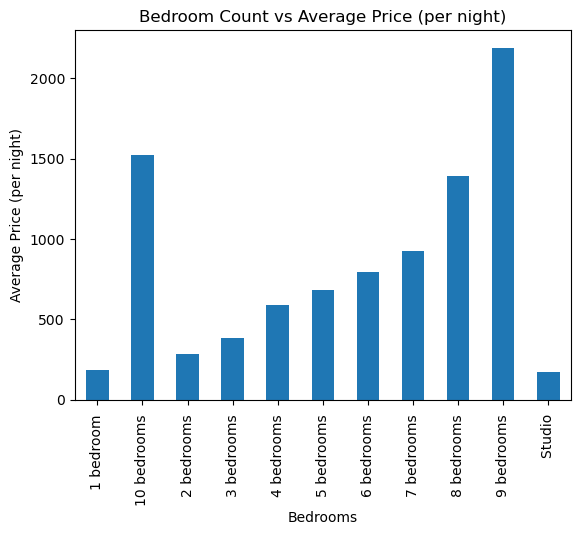

In [58]:
# Plot Average Price vs Number of Bedrooms

xvalues = ri_listings.groupby("bedrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (per night)")
plt.title("Bedroom Count vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

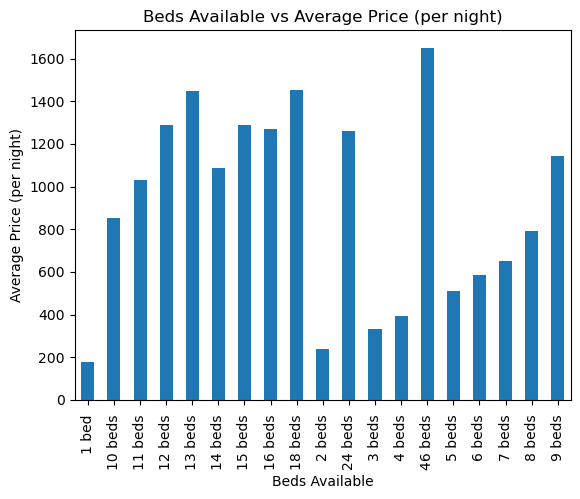

In [59]:
# Plot Average Price vs Number of Beds

xvalues = ri_listings.groupby("beds")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Beds Available")
plt.ylabel("Average Price (per night)")
plt.title("Beds Available vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

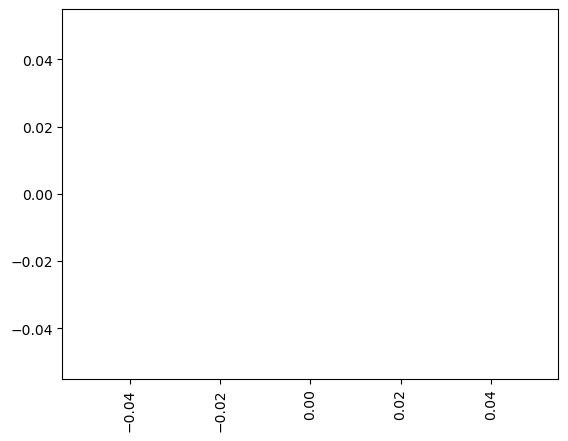

In [60]:
# Plot Average Price vs Number of Bathrooms

xvalues = ri_listings.groupby("bathrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price (per night)")
plt.title("Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [61]:
# Grouped Bedrooms/Number of Beds vs Average Price

bedrooms_beds = ri_listings.groupby(['bedrooms','beds'])['price'].mean()
bedrooms_beds_df = pd.DataFrame(data=bedrooms_beds)
bedrooms_beds_df

price
bedrooms    beds                
1 bedroom   1 bed     172.462171
            2 beds    210.247216
            3 beds    307.734375
            4 beds    235.500000
            5 beds     95.000000
...                          ...
9 bedrooms  9 beds   3372.333333
Studio      1 bed     155.886076
            2 beds    199.421053
            3 beds    270.500000
            4 beds    343.000000

[86 rows x 1 columns]

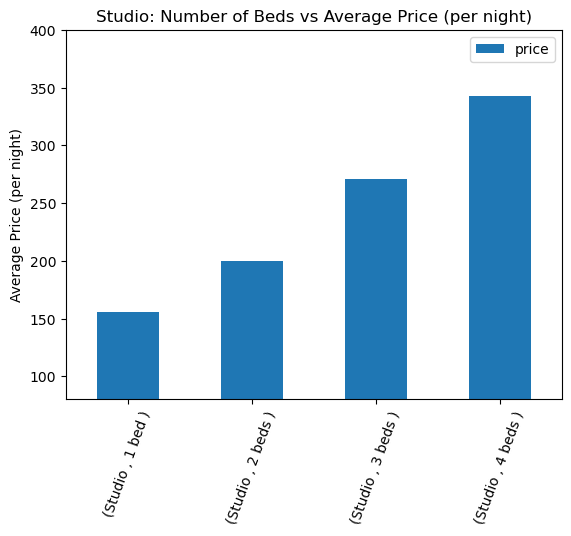

In [66]:
# Plot Studio/Number of Beds vs Average Price

studio_beds = bedrooms_beds_df.iloc[82:86,:]
studio_beds.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Studio: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 400)
plt.show()

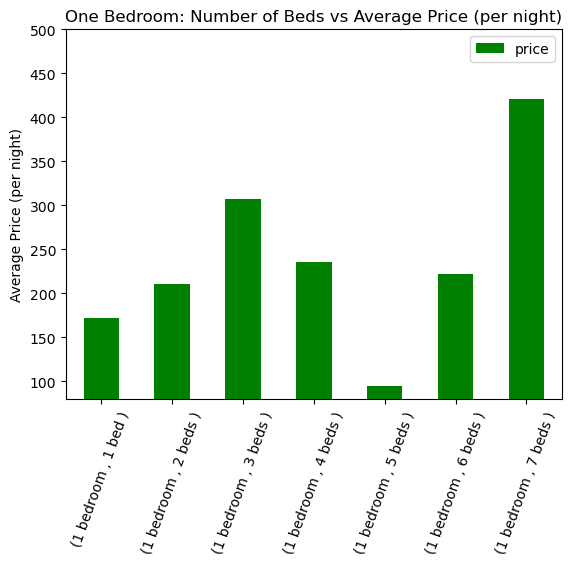

In [67]:
# Plot One Bedroom/Number of Beds vs Average Price

one_bedroom = bedrooms_beds_df.iloc[0:7,:]
one_bedroom.plot(kind="bar", color="green")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("One Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 500)
plt.show()

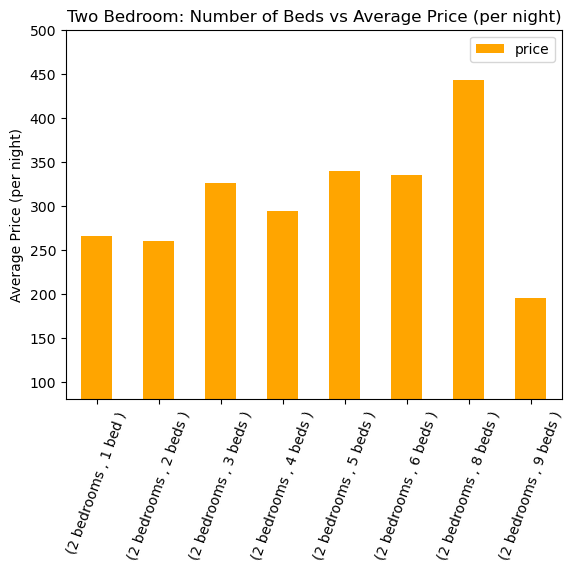

In [71]:
# Plot Two Bedroom/Number of Beds vs Average Price

two_bedroom = bedrooms_beds_df.iloc[12:20,:]
two_bedroom.plot(kind="bar", color="orange")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Two Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 500)
plt.show()

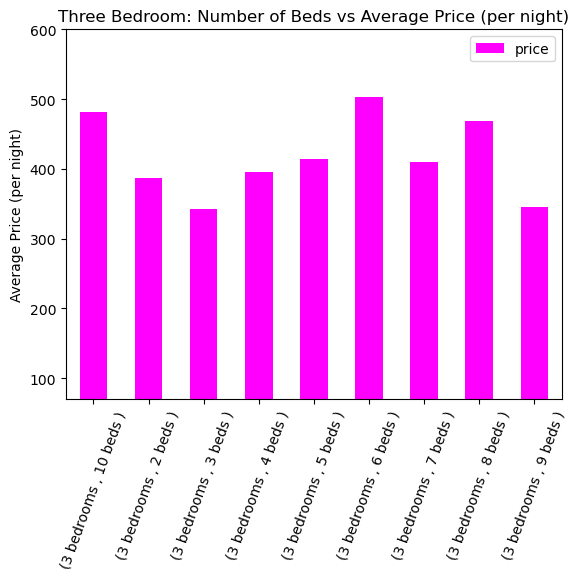

In [77]:
# Plot Three Bedroom/Number of Beds vs Average Price

three_bedrooms_bed = bedrooms_beds_df.iloc[21:30,:]
three_bedrooms_bed.plot(kind="bar", color="magenta")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Three Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(70, 600)
plt.show()

In [78]:
# Grouped Bedrooms/Number of Bathrooms vs Average Price

bedrooms_bathrooms = ri_listings.groupby(['bedrooms','baths'])['price'].mean()
bedrooms_bathrooms_df = pd.DataFrame(data=bedrooms_bathrooms)
bedrooms_bathrooms_df

price
bedrooms   baths                       
1 bedroom   0 shared baths   127.250000
           0.5 baths         116.666667
           1 bath            208.805668
           1 private bath    221.270968
           1 shared bath     108.217228
...                                 ...
Studio     1 private bath    151.428571
           1 shared bath     103.000000
           1.5 baths          86.500000
           1.5 shared baths   57.000000
           2 baths           319.000000

[106 rows x 1 columns]

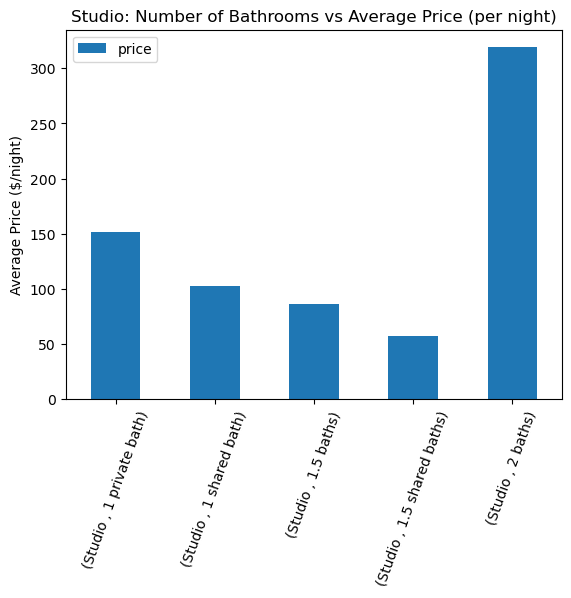

In [79]:
# Plot Studio/Number of Bathrooms vs Average Price

studio_bath = bedrooms_bathrooms_df.iloc[101:106,:]
studio_bath.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Studio: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

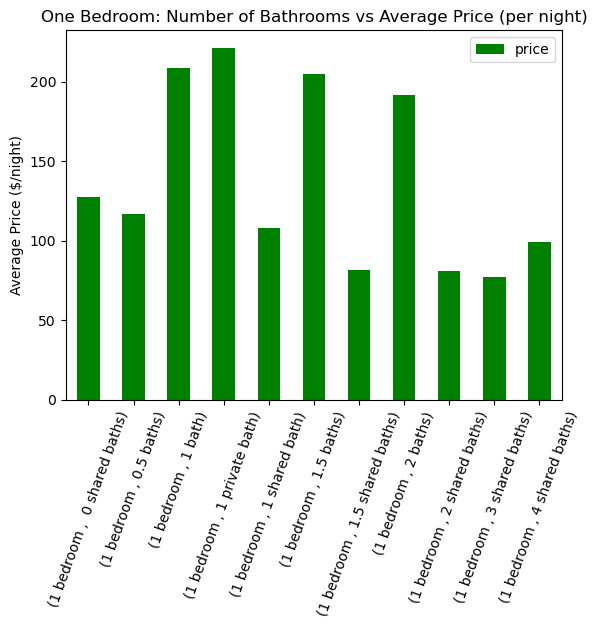

In [82]:
# Plot One Bedroom/Number of Bathrooms vs Average Price

one_bedroom_bath = bedrooms_bathrooms_df.iloc[0:11,:]
one_bedroom_bath.plot(kind="bar", color="green")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("One Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

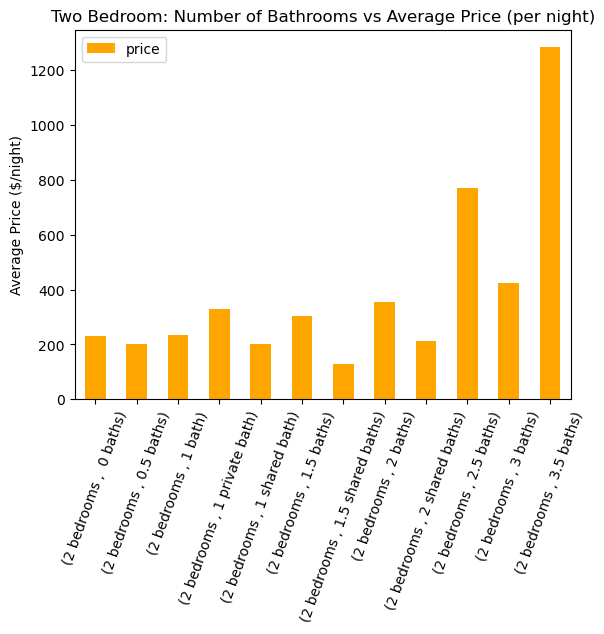

In [86]:
# Plot Two Bedroom/Number of Bathrooms vs Average Price

two_bedroom_baths = bedrooms_bathrooms_df.iloc[16:28,:]
two_bedroom_baths.plot(kind="bar", color='orange')
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Two Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

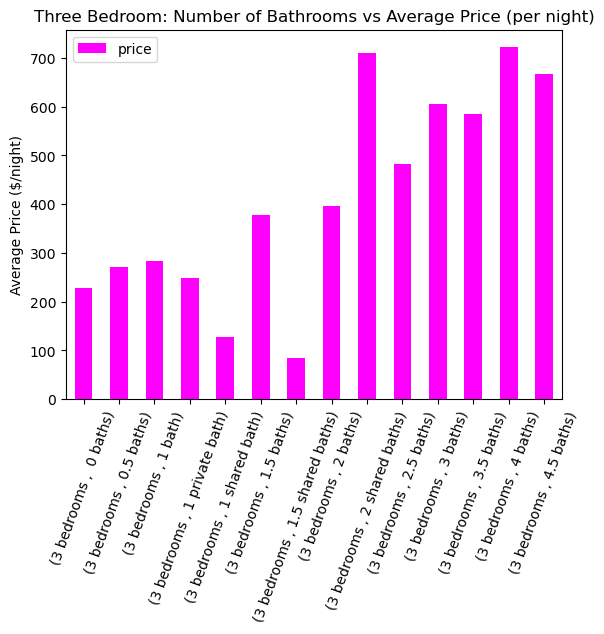

In [88]:
# Plot Three Bedroom/Number of Bathrooms vs Average Price

three_bedrooms_baths = bedrooms_bathrooms_df.iloc[28:42,:]
three_bedrooms_baths.plot(kind="bar", color='magenta')
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Three Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

In [105]:
# Grouped Bedrooms/Room Type vs Average Price

types_bedrooms_price = ri_listings.groupby(['bedrooms','room_type'])['price'].mean()
types_bedrooms_price_df = pd.DataFrame(data=types_bedrooms_price)
one_bedroom = types_bedrooms_price_df.iloc[0:4,:]
two_three_bedrooms = types_bedrooms_price_df.iloc[6:11,:]
studio_bedrooms = types_bedrooms_price_df.iloc[21:22,:]
dfs_list = [studio_bedrooms, one_bedroom, two_three_bedrooms]
bedrooms_roomtype_price_merge = pd.concat(dfs_list)
bedrooms_roomtype_price_merge

price
bedrooms    room_type                  
Studio      Entire home/apt  169.660194
1 bedroom   Entire home/apt  206.030851
            Hotel room       263.529412
            Private room     164.973618
            Shared room      227.500000
2 bedrooms  Entire home/apt  283.038827
            Private room     355.955556
            Shared room       90.000000
3 bedrooms  Entire home/apt  383.633937
            Private room     421.956522

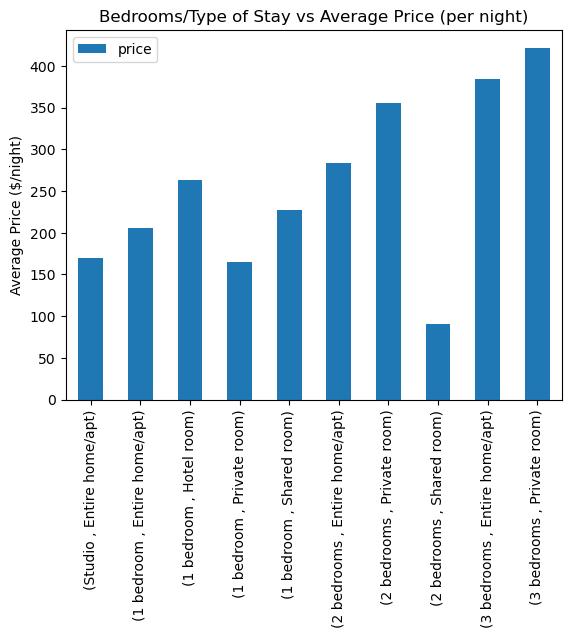

In [106]:
# Plot Bedrooms/Type of Stay vs Average Price

bedrooms_roomtype_price_merge.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Bedrooms/Type of Stay vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [107]:
# Create DataFrame with Reviews greater than 35

ri_reviews = ri_listings.loc[ri_listings["number_of_reviews"] > 35]
ri_reviews

,id,name,bedrooms,beds,baths,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
65,43667960,Hotel in Middletown,1 bedroom,2 beds,1 private bath,320288463,Atlantic Beach Hotel,12/23/19,NaN,NaN,...,4.45,4.73,4.22,NaN,t,13,2,10,0,1.28
72,24115348,Boutique hotel in Middletown,1 bedroom,2 beds,1 private bath,320288463,Atlantic Beach Hotel,12/23/19,NaN,NaN,...,4.60,4.76,4.33,NaN,t,13,2,10,0,0.82
81,24476378,Boutique hotel in Middletown,1 bedroom,2 beds,1 private bath,320288463,Atlantic Beach Hotel,12/23/19,NaN,NaN,...,4.40,4.80,4.36,NaN,t,13,2,10,0,0.68
83,593234066271070000,Cottage in South Kingstown,1 bedroom,2 beds,1 bath,141325860,Emily,7/19/17,NaN,within an hour,...,4.83,4.75,4.14,NaN,f,7,7,0,0,2.23
91,54337768,Condo in Providence,1 bedroom,1 bed,1 bath,76629253,Martin,6/8/16,"Revere, MA",within an hour,...,4.71,4.87,4.43,RE.03213-STR,f,1,1,0,0,5.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5254,18156913,Home in South Kingstown,Studio,1 bed,1 private bath,125216714,Jacquelyn,4/10/17,NaN,NaN,...,5.00,4.95,4.90,NaN,f,1,0,1,0,0.52
5255,19571622,Guesthouse in Bristol,Studio,1 bed,1 bath,9598224,Sharon,10/23/13,"Bristol, RI",within an hour,...,5.00,4.95,4.89,206185,t,1,1,0,0,1.08
5256,19801627,Guest suite in South Kingstown,Studio,2 beds,1 bath,139858227,Margaret,7/11/17,"South Kingstown, RI",NaN,...,4.99,4.97,4.97,NaN,f,1,1,0,0,1.08
5257,21548343,Guest suite in South Kingstown,Studio,1 bed,1 bath,156665487,Denise And Ray,10/29/17,"South Kingstown, RI",within an hour,...,5.00,4.96,4.96,202579,f,1,1,0,0,5.99


In [108]:
# Group New DataFrame by Bedrooms/Room Type and Average of Each of the 7 Scores

types_bedrooms_accuracy = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_accuracy'].mean()
types_bedrooms_cleanliness = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_cleanliness'].mean()
types_bedrooms_value = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_value'].mean()
types_bedrooms_communication = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_communication'].mean()
types_bedrooms_location = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_location'].mean()
types_bedrooms_check_in = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_checkin'].mean()
types_bedrooms_ratings = ri_reviews.groupby(['bedrooms','room_type'])['review_scores_rating'].mean()

# Convert grouped data into Dataframes

types_bedrooms_accuracy_df = pd.DataFrame(data=types_bedrooms_accuracy)
types_bedrooms_cleanliness_df = pd.DataFrame(data=types_bedrooms_cleanliness)
types_bedrooms_value_df = pd.DataFrame(data=types_bedrooms_value)
types_bedrooms_communication_df = pd.DataFrame(data=types_bedrooms_communication)
types_bedrooms_check_in_df = pd.DataFrame(data=types_bedrooms_check_in)
types_bedrooms_location_df = pd.DataFrame(data=types_bedrooms_location)
types_bedrooms_ratings_df = pd.DataFrame(data=types_bedrooms_ratings)

# Merge Dataframes

first_merge = pd.merge(types_bedrooms_accuracy_df,types_bedrooms_cleanliness_df, on=['bedrooms','room_type']).merge(types_bedrooms_value_df,on=['bedrooms','room_type'])
second_merge = pd.merge(types_bedrooms_communication_df,types_bedrooms_check_in_df, on=['bedrooms','room_type']).merge(types_bedrooms_location_df,on=['bedrooms','room_type'])
review_df = pd.merge(first_merge,second_merge, on=['bedrooms','room_type']).merge(types_bedrooms_ratings_df,on=['bedrooms','room_type'])
review_df

review_scores_accuracy  \
bedrooms     room_type                                 
1 bedroom    Entire home/apt                4.902423   
             Hotel room                     4.741538   
             Private room                   4.891531   
10 bedrooms  Entire home/apt                4.800000   
2 bedrooms   Entire home/apt                4.887254   
             Private room                   4.916522   
3 bedrooms   Entire home/apt                4.895959   
             Private room                   4.882000   
4 bedrooms   Entire home/apt                4.890794   
5 bedrooms   Entire home/apt                4.892800   
6 bedrooms   Entire home/apt                4.935714   
7 bedrooms   Entire home/apt                4.886667   
             Private room                   4.810000   
8 bedrooms   Entire home/apt                4.943333   
9 bedrooms   Entire home/apt                4.950000   
Studio       Entire home/apt                4.926182   
             Private room                   4.890000   

                              review_scores_cleanliness  review_scores_value  \
bedrooms     room_type                                                         
1 bedroom    Entire home/apt                   4.883995             4.789536   
             Hotel room                        4.833077             4.649231   
             Private room                      4.871939             4.817891   
10 bedrooms  Entire home/apt                   4.840000             4.740000   
2 bedrooms   Entire home/apt                   4.865088             4.769572   
             Private room                      4.893913             4.833913   
3 bedrooms   Entire home/apt                   4.863219             4.780274   
             Private room                      4.890000             4.796000   
4 bedrooms   Entire home/apt                   4.841984             4.776032   
5 bedrooms   Entire home/apt                   4.821200             4.779800   
6 bedrooms   Entire home/apt                   4.901429             4.822857   
7 bedrooms   Entire home/apt                   4.820000             4.746667   
             Private room                      4.650000             4.770000   
8 bedrooms   Entire home/apt                   4.910000             4.813333   
9 bedrooms   Entire home/apt                   4.960000             4.950000   
Studio       Entire home/apt                   4.926182             4.830182   
             Private room                      4.910000             4.780000   

                              review_scores_communication  \
bedrooms     room_type                                      
1 bedroom    Entire home/apt                     4.936933   
             Hotel room                          4.791538   
             Private room                        4.918197   
10 bedrooms  Entire home/apt                     4.920000   
2 bedrooms   Entire home/apt                     4.917431   
             Private room                        4.934783   
3 bedrooms   Entire home/apt                     4.929349   
             Private room                        4.940000   
4 bedrooms   Entire home/apt                     4.940952   
5 bedrooms   Entire home/apt                     4.939200   
6 bedrooms   Entire home/apt                     4.935714   
7 bedrooms   Entire home/apt                     4.946667   
             Private room                        4.860000   
8 bedrooms   Entire home/apt                     4.963333   
9 bedrooms   Entire home/apt                     4.970000   
Studio       Entire home/apt                     4.943455   
             Private room                        4.944000   

                              review_scores_checkin  review_scores_location  \
bedrooms     room_type                                                        
1 bedroom    Entire home/apt               4.944562                4.883273   
             Hotel room                    4.85

In [114]:
# Narrow Dataframe into 4 Groups

review_filtered_one = review_df.iloc[0:3,:]
review_filtered_two_three = review_df.iloc[4:8]
review_filtered_studio = review_df.iloc[15:17,:]
df_list = [review_filtered_one, review_filtered_two_three, review_filtered_studio]
review_merge = pd.concat(df_list)
review_merged = review_merge.rename =['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value',
                       'review_scores_communication', 'review_scores_location', 'review_scores_checkin',
                       'review_scores_rating']
review_merge

review_scores_accuracy  \
bedrooms    room_type                                 
1 bedroom   Entire home/apt                4.902423   
            Hotel room                     4.741538   
            Private room                   4.891531   
2 bedrooms  Entire home/apt                4.887254   
            Private room                   4.916522   
3 bedrooms  Entire home/apt                4.895959   
            Private room                   4.882000   
Studio      Entire home/apt                4.926182   
            Private room                   4.890000   

                             review_scores_cleanliness  review_scores_value  \
bedrooms    room_type                                                         
1 bedroom   Entire home/apt                   4.883995             4.789536   
            Hotel room                        4.833077             4.649231   
            Private room                      4.871939             4.817891   
2 bedrooms  Entire home/apt                   4.865088             4.769572   
            Private room                      4.893913             4.833913   
3 bedrooms  Entire home/apt                   4.863219             4.780274   
            Private room                      4.890000             4.796000   
Studio      Entire home/apt                   4.926182             4.830182   
            Private room                      4.910000             4.780000   

                             review_scores_communication  \
bedrooms    room_type                                      
1 bedroom   Entire home/apt                     4.936933   
            Hotel room                          4.791538   
            Private room                        4.918197   
2 bedrooms  Entire home/apt                     4.917431   
            Private room                        4.934783   
3 bedrooms  Entire home/apt                     4.929349   
            Private room                        4.940000   
Studio      Entire home/apt                     4.943455   
            Private room                        4.944000   

                             review_scores_checkin  review_scores_location  \
bedrooms    room_type                                                        
1 bedroom   Entire home/apt               4.944562                4.883273   
            Hotel room                    4.851538                4.861538   
            Private room                  4.932041                4.811361   
2 bedrooms  Entire home/apt               4.934786                4.864736   
            Private room                  4.925652                4.893043   
3 bedrooms  Entire home/apt               4.948870                4.876062   
            Private room                  4.928000                4.942000   
Studio      Entire home/apt               4.954909                4.902545   
            Private room                  4.938000                4.968000   

                             review_scores_rating  
bedrooms    room_type                              
1 bedroom   Entire home/apt              4.868505  
            Hotel room                   4.715385  
            Private room                 4.853129  
2 bedrooms  Entire home/apt              4.856398  
            Private room                 4.879130  
3 bedrooms  Entire home/apt              4.873493  
            Private room                 4.886000  
Studio      Entire home/apt              4.899636  
            Private room                 4.874000

/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_47410/84710771.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(studio_scores_transposed.index, rotation=70)


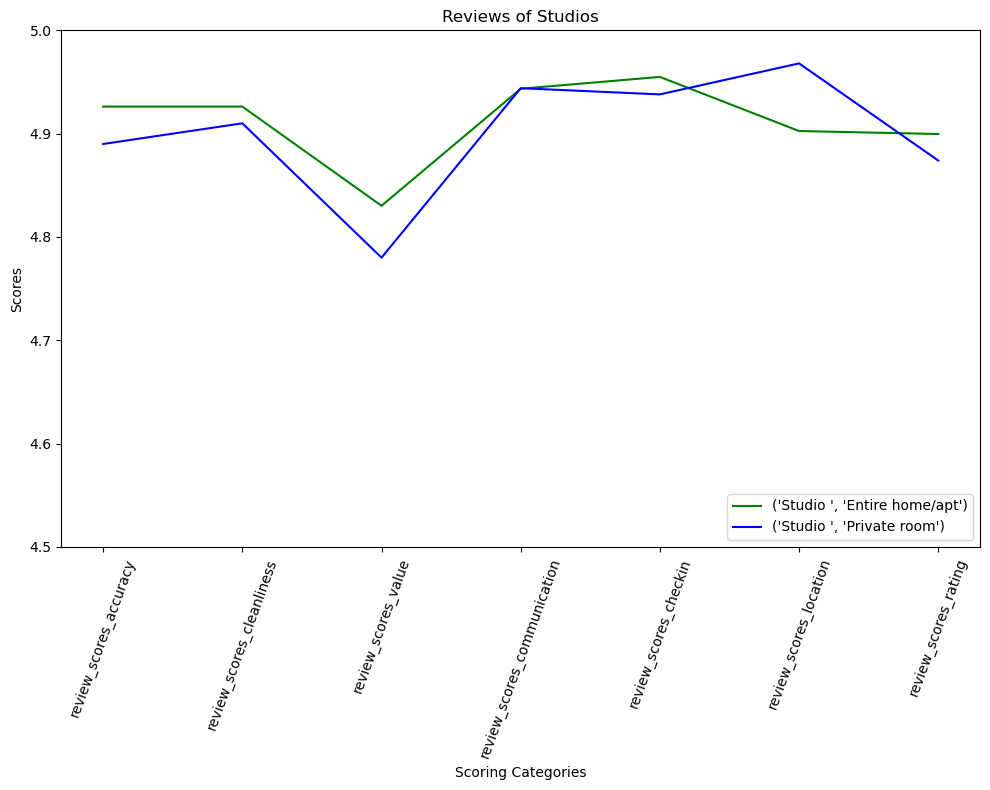

In [115]:
# Plot Different Roomtypes for Studios and their related Scores

studio_scores_transposed = review_filtered_studio.T
colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(studio_scores_transposed.columns):
    ax.plot(studio_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(studio_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Studios")
plt.tight_layout()
plt.show()

/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_47410/2257056693.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(one_bedroom_scores_transposed.index, rotation=70)


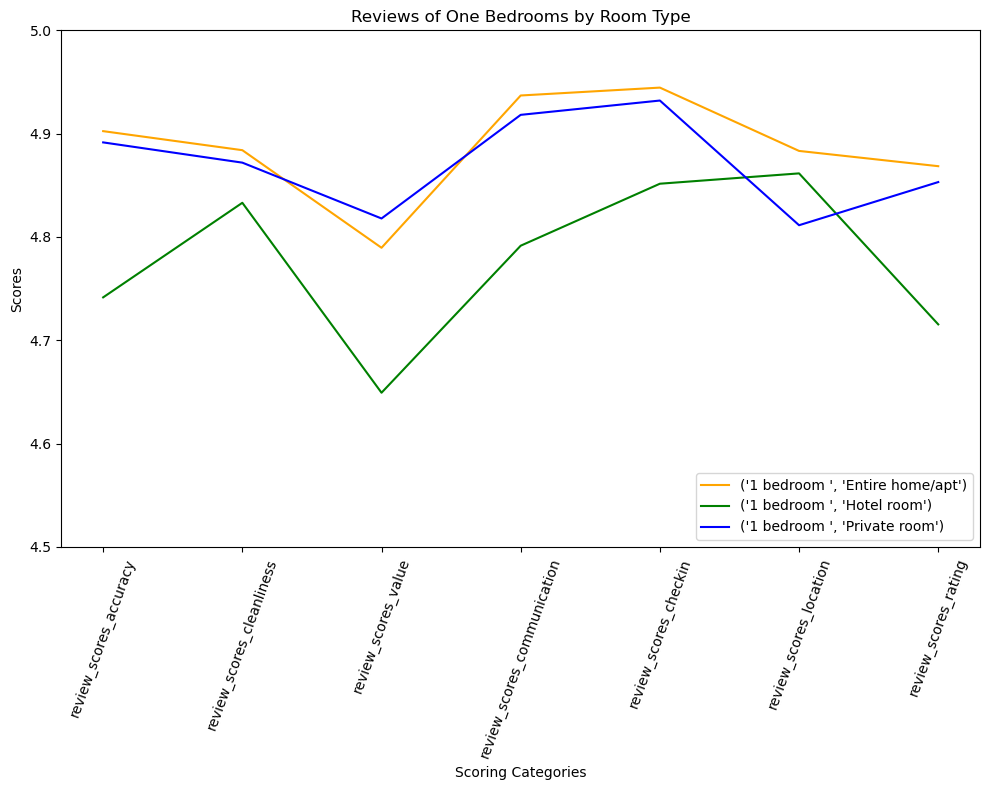

In [117]:
one_bedroom_scores = review_merge.iloc[0:3, :]
one_bedroom_scores_transposed = one_bedroom_scores.T

colors = ['orange', 'g', 'b', 'purple']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(one_bedroom_scores_transposed.columns):
    ax.plot(one_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(one_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of One Bedrooms by Room Type")
plt.tight_layout()
plt.show()

/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_47410/1915415299.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(two_bedroom_scores_transposed.index, rotation=70)


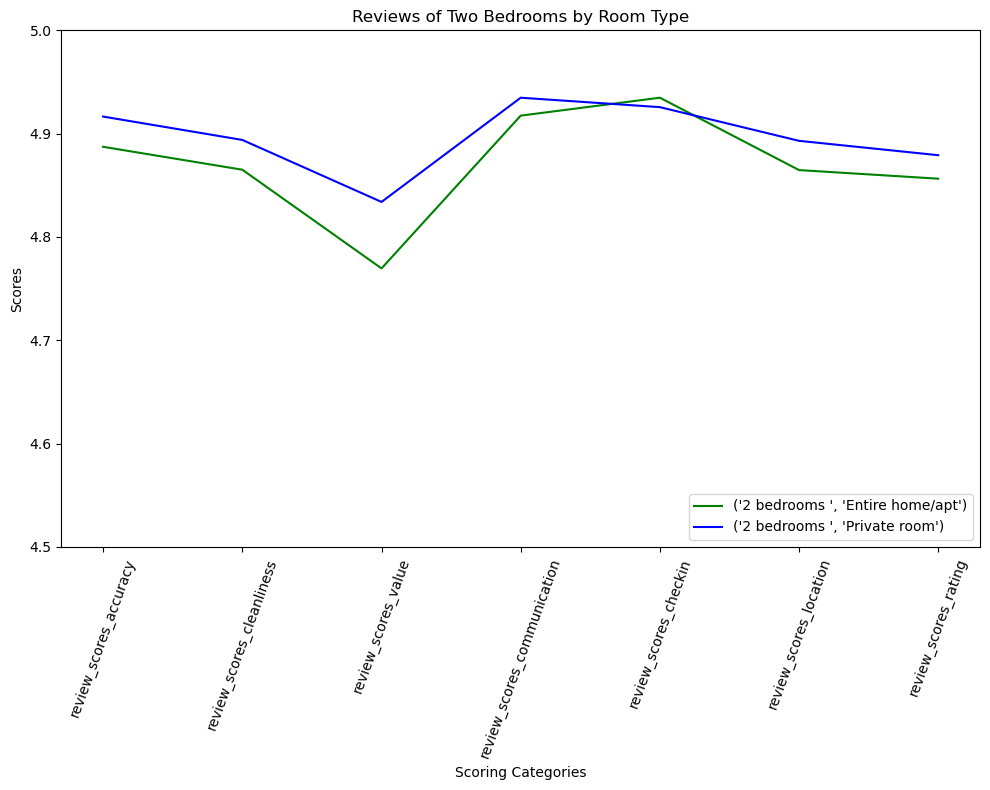

In [120]:
# Plot Different Roomtypes for Two Bedroom and their related Scores

two_bedroom_scores = review_merge.iloc[3:5, :]
two_bedroom_scores_transposed = two_bedroom_scores.T

colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(two_bedroom_scores_transposed.columns):
    ax.plot(two_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(two_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Two Bedrooms by Room Type")
plt.tight_layout()
plt.show()

/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_47410/1982254497.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(three_bedroom_scores_transposed.index, rotation=70)


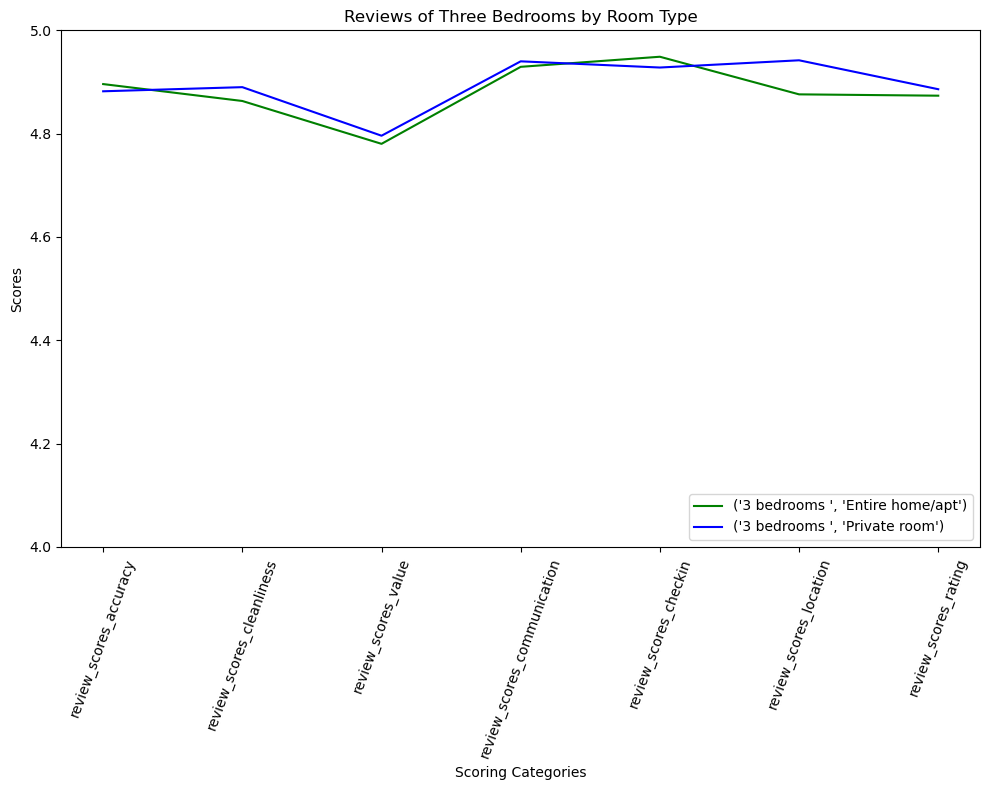

In [122]:
# Plot Different Roomtypes for Three Bedroom and their related Scores

three_bedroom_scores = review_merge.iloc[5:7, :]
three_bedroom_scores_transposed = three_bedroom_scores.T

colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(three_bedroom_scores_transposed.columns):
    ax.plot(three_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(three_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.0, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Three Bedrooms by Room Type")
plt.tight_layout()
plt.show()